<div>
    <div style="background-color : pink">
    <h1 style="text-align: center; padding: 30px;color: #fff">
            Projet 10 - Détecter des faux billets
        </h1>
    </div> 
    

<div>
    <div style="background-color : fff">
    <h1 style="text-align: center; padding: 30px;color: pink">
            Régression Linéaire 
        </h1>
    </div> 

<div>
    <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonction</li>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
                <li><a href="#partie2">Partie 2</a> : Importation et visualisation des données </li>
                <li><a href="#partie3">Partie 3</a> : Traitement des valeurs manquantes</li>
                <li><i> 3.1 - visualisation des valeurs manquantes</i></li>
                <li><i> 3.2 - Création de deux dataFrames un 1er sans valeurs NaN et un 2ème qu'avec valeurs NaN</i></li>
                <li><a href="#partie4">Partie 4</a> : Régression linéaires OLS (moindres carrés ordinaire)</li>
                <li><i> 4.1 - Régression linéaire OLS (moindres carrés ordinnaire)</i></li>
                <li><i> 4.2 - Test de la colinéarité</i></li>
                <li><i> 4.3 - Test de l'homoscédasticité (test Breusch-Pagan)</i></li>
                <li><i> 4.4 - Test de la normalité des résidus (Shapiro-Wilk)</i></li>
                 <li><a href="#partie5">Partie 5</a> : Prédictions</li>
                 <li><a href="#partie6">Partie 6</a> : Df_final</li>
                <li><i> 6.1 - Création du "Df_final"</i></li>
                <li><i> 6.2 - Régression linéaire OLS (moindres carrés ordinnaire) du "Df_final"</i></li>
                <li><i> 6.3 - Test de la normalité des résidus du "Df_final"</i></li>
                <li><i> 6.4 - Écriture du "Df_final" en fichier csv </i></li>         
                <li><a href="#Conclusion">Conclusion</a></li>
           </lu>
        </div>
    </div>
</div>

---
## <font color=pink> Lexique des données </font>

<font> - Dimensions exprimées en mm </font>
 
* is_genuine : Indique si le billet est vrai (True) ou faux (False)
* diagonal : la diagonale du billet 
* height_left : la hauteur côté gauche du billet 
* height_right : La hauteur côté droit du billet 
* margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci 
* margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci
* length : la longueur du billet 


---
<div>
    <div style="background-color: pink;" id="partie1">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <lu>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
            <lu>
                <div>
                    <div>
                        <div>

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.1 - Importation des librairies 
        </h3>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

<div>
        <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">
            1.2 - Définition d'une fonction
        </h3>
</div>

#### <font> Cette fonction : </font>
*  Calcul le nombre de ligne et de colonne
*  Donne le type des données
*  Calcul des données statistiques descriptives (nombre, valeurs uniques, moyenne, écart type, valeur mini/maxi etc...)
*  Affiche les 5 premières lignes de notre dataFrame
*  Détecte une éventuelle clé primaire
*  Indique le nombre de valeurs manquantes ainsi que les doublons

In [2]:
# Définition de la fonction "analyseDataFrame"
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())

---
<div>
    <div style="background-color: pink;" id="partie2">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - Importation et visualisation des données
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

In [3]:
# Importation du dataFrame
Df_Billets = pd.read_csv("billets.csv", sep=";")

# visualisation du dataFrame
analyseDataFrame(Df_Billets) 


La dimension de DataFrame « Df_Billets » : (1500, 7) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Compter les duplicates:


0

---
<div>
    <div style="background-color: pink;" id="partie3">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 3 - Traitement des valeurs manquantes
        </h2>
        <lu>
                <li><i> 3.1 - visualisation des valeurs manquantes</i></li>
                <li><i> 3.2 - Création de deux dataFrames un 1er sans valeurs NaN et un 2ème qu'avec valeurs NaN</i></li>
            <lu>
                <div>
                    <div>
                        <div>
                             

### Le traitement des valeurs manquantes est une étape importante lors de la préparation des données. Il est important de comprendre d’où proviennent les valeurs manquantes ainsi que leur différents types d'un point de vue statistique. Le type de données manquantes influera sur la manière dont on les remplira. 


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            3.1 - visualisation des valeurs manquantes
        </h3>
    </div>

margin_low      0.024667
is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_up       0.000000
length          0.000000
dtype: float64

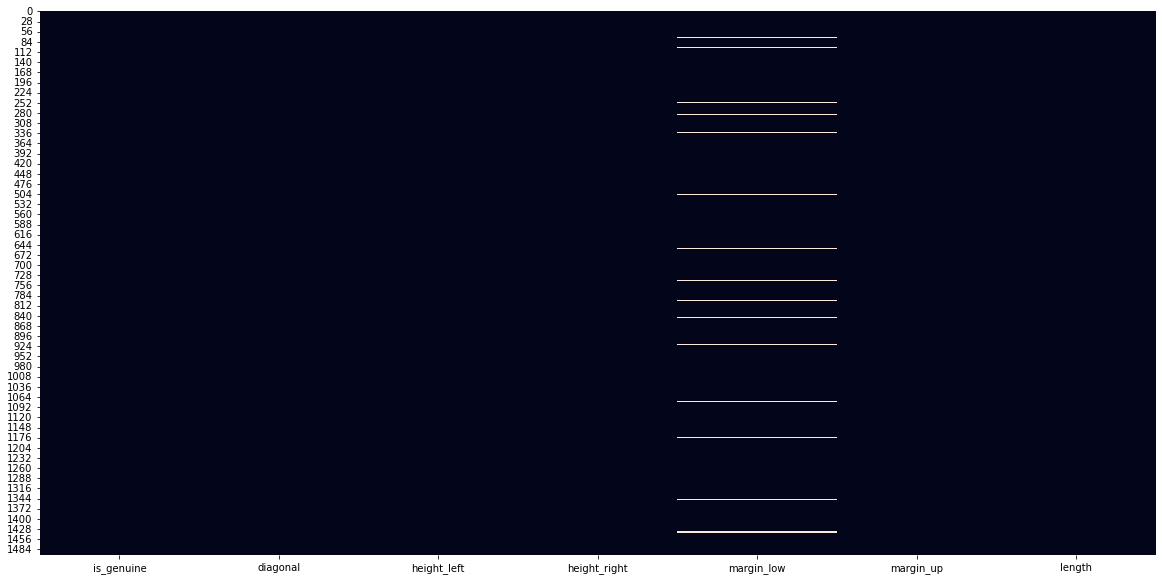

In [4]:
# Visualisation de valeurs nulles avec heatmap
plt.figure(figsize=(20,10))
sns.heatmap(Df_Billets.isna(), cbar=False)

# Visualisation du pourcentage de valeurs manquantes
(Df_Billets.isna().sum()/Df_Billets.shape[0]).sort_values(ascending=False)
 

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            3.2 - Création de deux dataFrames un 1er sans valeurs NaN et un 2ème qu'avec valeurs NaN 
        </h3>
    </div>

In [5]:
# Création dataFrame sans valeurs NaN
Df_SansNaN = Df_Billets.dropna()
Df_SansNaN.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# Création d'un dataFrame qu'avec valeurs NaN 
Df_NaN = Df_Billets[Df_Billets["margin_low"].isna()]
Df_NaN

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


---
<div>
    <div style="background-color: pink;" id="partie4">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 4 - Régression linéaires OLS (moindres carrés ordinaire)
        </h2>
        <lu>
                <li><i> 4.1 - Régression linéaire OLS (moindres carrés ordinnaire)</i></li>
                <li><i> 4.2 - Test de la colinéarité</i></li>
                <li><i> 4.3 - Test de l'homoscédasticité (test Breusch-Pagan)</i></li>
                <li><i> 4.4 - Test de la normalité des résidus (Shapiro-Wilk)</i></li>
            <lu>
                <div>
                    <div>
                        <div>
                            <div>

### La régression OLS (moindres carrés ordinaires) est une technique pour estimer les coefficients d'une régression linéaire qui décrivent les relations entre une ou plusieurs variables quantitatives et une variable dépendante (selon si la régression linéaire est simple ou multiple)

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            4.1 - Régression linéaire OLS (moindres carrés ordinnaire)
        </h3>
    </div>

In [7]:
# Choix des variables significatives
reg_multi = smf.ols("margin_low~diagonal+height_left+height_right+margin_up+length", data=Df_SansNaN).fit() 

# Visualisation des résultats
print (reg_multi.summary())


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.60e-202
Time:                        11:48:07   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

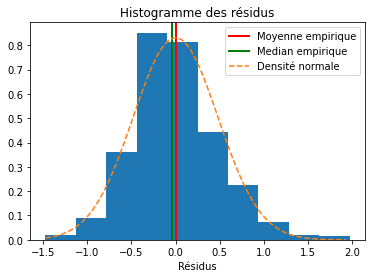

In [8]:
# Visualisation des résidus avec barplot
plt.hist(reg_multi.resid, density=True)

moyenne_bar = np.mean(reg_multi.resid)# Moyenne
median_bar = np.median(reg_multi.resid)# Median
sprime = np.std(reg_multi.resid, ddof=1)# Écart-type
sprime2 = np.var(reg_multi.resid, ddof=1)# Variance non biaisée

plt.axvline(moyenne_bar, color="r", linewidth=2, label="Moyenne empirique")
plt.axvline(median_bar, color="g", linewidth=2, label="Median empirique")
bins= np.arange(reg_multi.resid.min(), reg_multi.resid.max(),0.05)
y = scs.norm.pdf(bins, moyenne_bar, sprime)
plt.plot(bins,y,"--", label="Densité normale")

plt.xlabel("Résidus")
plt.title("Histogramme des résidus")
plt.legend()
plt.show()

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            4.2 - Test de la colinéarité
        </h3>
    </div>

### Après une régression linéaire on vérifie l'hypothèse de non colinéarité des variables explicatives.

In [9]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.0136128990686333,
 1.138260573608249,
 1.230114515556036,
 1.4044037781843624,
 1.576950145366581]

### Tous les coefficients étant inférieurs à 10, il n'y a donc pas de problème de colinéarité.

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             4.3 - Test de l'homoscédasticité (test Breusch-Pagan)
        </h3>
    </div>

### L'homoscédasticité est la constance de la variance des résidus. 
### elle désigne le caractère d'une liaison entre deux variables lorsque la variance de Y est la même pour toutes les valeurs de X et réciproquement. Cette condition doit être remplie pour que toutes les prévisions faites sur Y à partir de X (ou sur X à partir de Y) aient le même degré de précision.
### En statistiques, le test de Breusch-Pagan permet de tester l'hypothèse d'homoscédasticité du terme d'erreur d'un modèle de régression linéaire.
 

In [10]:
# Test Breusch-pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:%.20f'% pval)

p value test Breusch Pagan:0.00000000000000077595


La p-valeur est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes(l'hypothèse d'homoscédasticité)

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             4.4 - Test de la normalité des résidus (Shapiro-Wilk)
        </h3>
    </div>

### Le test de Shapiro–Wilk teste l'hypothèse nulle selon laquelle un échantillon de 5000 individus maximum est issu d'une population normalement distribuée. 
### Le test rejette l'hypothèse de la normalité lorsque la valeur p est inférieure ou égale à 0,05.
## 

In [11]:
# H0 : l'échantillon semble avoir une distribution Gaussienne
# H1 : l'échantillon ne semble pas avoir une distribution Gaussienne

Df_Residus = "Résidus"


# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

stat, p_value = scs.shapiro(reg_multi.resid)
print("statistics=%.15f, p=%15f" %(stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {Df_Residus} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {Df_Residus} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()


statistics=0.985787928104401, p=       0.000000
L'échantillon Résidus ne semble pas avoir une distribution Gaussienne (rejeter H0)



L'hypothèse de normalité est remise en cause (p-value<0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.

---
<div>
    <div style="background-color: pink;" id="partie5">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 5 - Prédictions
        </h2>
        <lu>
                <li><i> 5.1 - Création du modèle</i></li>
                <li><i> 5.2 - Association des prédictions au DataFrame</i></li>
            <lu>
                <div>
                    <div>
                      

### Les algorithmes prédictifs sont des modèles  conçus pour anticiper les résultats futurs les plus sûrs en tenant compte des résultats survenus.
### Je souhaite utiliser la variable $margin_low$ comme prédicteur, je choisis le *Df_NaN* contenant uniquement les valeurs manquantes de la variables *margin_low*, puis j'utilise le model *reg_multi* pour faire des prédiction pour le jeu de données de test.


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             5.1 - Création du modèle
        </h3>
    </div>

In [12]:
# Création du modèle
predicteur = Df_NaN[["diagonal", "height_left", "height_right", "margin_up", "length"]]
y_predict = reg_multi.predict(predicteur)

# Visualisation 
y_predict[:37]


72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             5.2 - Association des prédictions au DataFrame
        </h3>
    </div>

In [13]:
# Association des valeurs de "y_predict" à la variable "margin_low" du "Df_NaN"
Df_NaN["margin_low"] = y_predict

#Visualisation du "Df_NaN"
Df_NaN

/var/folders/26/7wm85hd55hz7bmxmjhvssb_40000gn/T/ipykernel_67034/2229155128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_NaN["margin_low"] = y_predict


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
251,True,171.80,103.26,102.82,3.803308,2.95,113.22
284,True,171.92,103.83,103.76,4.179736,3.23,113.29
334,True,171.85,103.70,103.96,4.127442,3.00,113.36
410,True,172.56,103.72,103.51,4.135034,3.12,112.95
413,True,172.30,103.66,103.50,4.160539,3.16,112.95


---
<div>
    <div style="background-color: pink;" id="partie6">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 6 - Df_final
        </h2>
        <lu>
                <li><i> 6.1 - Création du "Df_final"</i></li>
                <li><i> 6.2 - Régression linéaire OLS (moindres carrés ordinnaire) du "Df_final"</i></li>
                <li><i> 6.3 - Test de la normalité des résidus du "Df_final"</i></li>
                <li><i> 6.4 - Écriture du "Df_final" en fichier csv </i></li>
            <lu>
                <div>
                    <div>
                        <div>
                            <div>

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             6.1 - Création du "Df_final"
        </h3>
    </div>

In [14]:
Df_billets_final = pd.concat([Df_SansNaN, Df_NaN])
analyseDataFrame(Df_billets_final)

La dimension de DataFrame « Df_billets_final » : (1500, 7) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.75,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.82,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.71,103.92,104.15,104.95
margin_low,1500.0,4.483475,0.659632,2.98,4.02,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.99,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.03,112.96,113.34,114.44


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Compter les duplicates:


0

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             6.2 - Régression linéaire OLS (moindres carrés ordinnaire) du "Df_final"
        </h3>
    </div>

In [15]:
reg_multi2 = smf.ols("margin_low~diagonal+height_left+height_right+margin_up+length", data=Df_billets_final).fit() 
print (reg_multi2.summary())


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.65e-211
Time:                        11:48:08   Log-Likelihood:                -1007.9
No. Observations:                1500   AIC:                             2028.
Df Residuals:                    1494   BIC:                             2060.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.427      2.439   

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             6.3 - Test de la normalité des résidus du "Df_final"
        </h3>
    </div>

In [16]:
# H0 : l'échantillon semble avoir une distribution Gaussienne
# H1 : l'échantillon ne semble pas avoir une distribution Gaussienne

Df_Residus2 = "Résidus"


# Interprétation : si la valeur-p est inférieure à une seuil α qu’on s’est donné (en général, 5%),
# alors on rejette H0.

stat, p_value = scs.shapiro(reg_multi2.resid)
print("statistics=%.15f, p=%15f" %(stat, p_value))

alpha = 0.05

if p_value > alpha:
    print(f"L'échantillon {Df_Residus2} semble avoir une distribution Gaussienne (ne pas rejeter H0)")
else:
    print(f"L'échantillon {Df_Residus2} ne semble pas avoir une distribution Gaussienne (rejeter H0)")
print()


statistics=0.984813094139099, p=       0.000000
L'échantillon Résidus ne semble pas avoir une distribution Gaussienne (rejeter H0)



<div>
<h3 style="margin: auto; padding: 10px;color: pink">
             6.4 - Écriture du "Df_Billets_Final" en fichier csv
        </h3>
    </div>

In [17]:
Df_billets_final.to_csv("Df_billets_final.csv", sep=";")
analyseDataFrame(Df_billets_final)


La dimension de DataFrame « Df_billets_final » : (1500, 7) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.75,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.82,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.71,103.92,104.15,104.95
margin_low,1500.0,4.483475,0.659632,2.98,4.02,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.99,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.03,112.96,113.34,114.44


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :
Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire
Compter les nulles pour chaque colonne :


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Compter les duplicates:


0

---
<div>
    <div style="background-color: pink;" id="Conclusion">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Conclusion
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Les 37 valeurs manquantes de la variable "margin_low" ont été comblées par une régression linéaire.
### Le test de normalité Shapiro-Wilk ainsi que la visualisation des résidus, permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes.
### Le dataFrame ne présente aucuns problème de colinéarité avec un score infèrieur à 10, et rejette l'hypothèse  𝐻0 selon laquelle les variances sont constantes(l'hypothèse d'homoscédasticité) avec une p-valeur inférieure à  5.
### Un modèle de prédictions a été créé afin de poursuivre notre analyse.
